## Reference from Deep learning for Computer Vision

In [68]:
import numpy as np
from matplotlib import pyplot as plt

# Logic of Neural Network
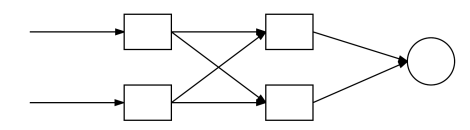

In [69]:
class NeuralNetwork:
    def __init__(self, N, alpha=0.1):
        # initialize the list of weights matrices, then store the
        # network architecture and learning rate
        self.W = []
        self.alpha = alpha
        # + 1 bias
        w1 = np.random.uniform(0,1, (N + 1, N + 1))
        self.W.append(w1)
        w2 = np.random.uniform(0,1, (N + 1, 1))
        self.W.append(w2)
    def sigmoid(self, x):
            # compute and return the sigmoid activation value for a
        # given input value
        return 1.0 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that `x` has already been passed through the `sigmoid`
        # function
        return x * (1 - x)

    def fit(self, X, y, epochs=1000):
        history = []
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train
            # our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)

            # check to see if we should display a training update
            loss = self.calculate_loss(X, y)
            history.append(loss)
        return history
                

    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it's just the input
        # feature vector itself
        A = [np.atleast_2d(x)]

        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])

            # computing the "net output" is simply applying our
            # non-linear activation function to the net input
            out = self.sigmoid(net)

            # once we have the net output, add it to our list of
            # activations
            A.append(out)

        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target
        # value
        error = A[-1] - y

        # from here, we need to apply the chain rule and build our
        # list of deltas `D`; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [error * self.sigmoid_deriv(A[-1])]

        # once you understand the chain rule it becomes super easy
        # to implement with a `for` loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in np.arange(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the non-linear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)

        # since we looped over our layers in reverse order we need to
        # reverse the deltas
        D = D[::-1]

        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in np.arange(0, len(self.W)):
            # update our weights by taking the dot product of the layer
            # activations with their respective deltas, then multiplying
            # this value by some small learning rate and adding to our
            # weight matrix -- this is where the actual "learning" takes
            # place
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self, X, addBias=True):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)

        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            p = np.c_[p, np.ones((p.shape[0]))]

        # loop over our layers in the network
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is as simple as taking
            # the dot product between the current activation value `p`
            # and the weight matrix associated with the current layer,
            # then passing this value through a non-linear activation
            # function
            p = self.sigmoid(np.dot(p, self.W[layer]))

        # return the predicted value
        return p

    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, addBias=False)
        loss = np.mean(np.abs(predictions - targets))

        # return the loss
        return loss

# More explain about compute the derivative function (in Vietnamese)

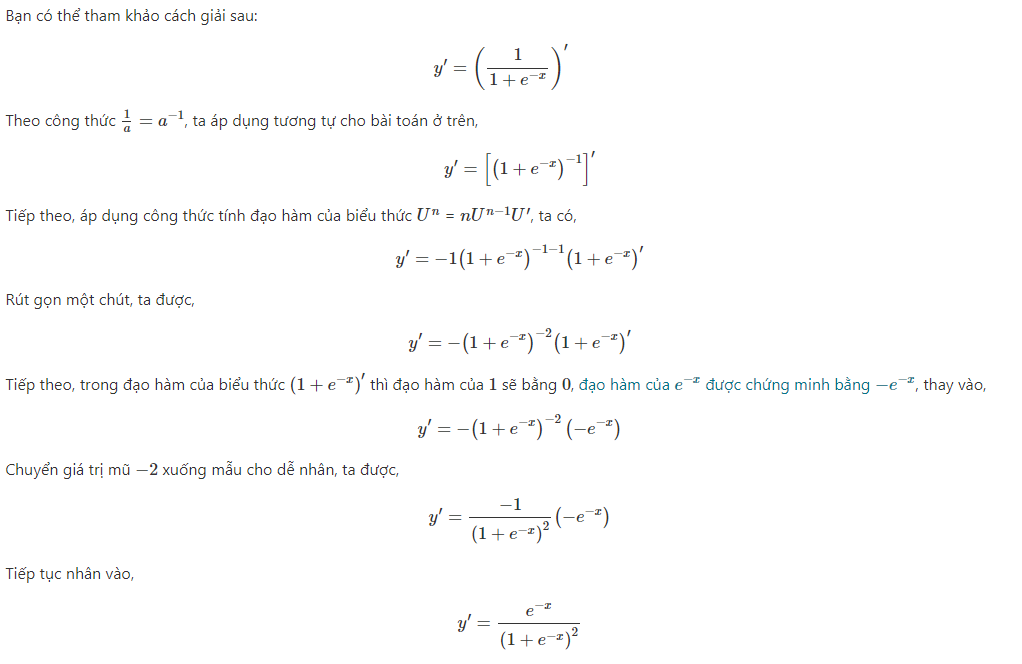

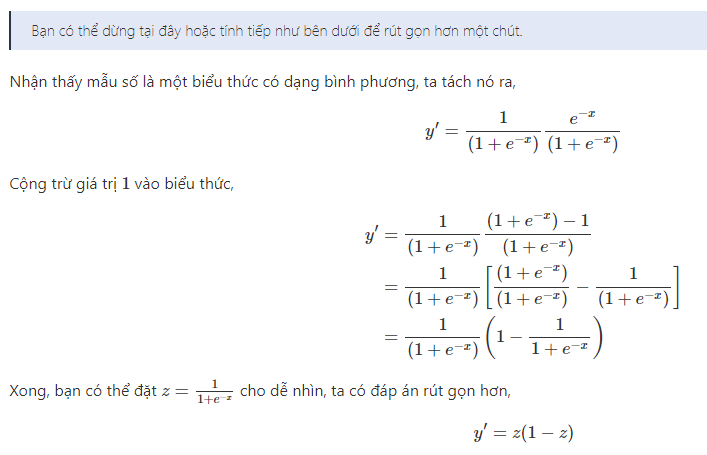

In [70]:
nn = NeuralNetwork(2)
print(nn)

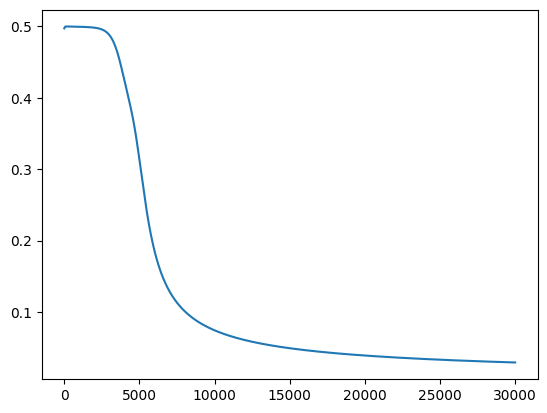

In [71]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
history = nn.fit(X, y, epochs=30000)
plt.plot(history)
plt.show()

In [72]:
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    p = nn.predict(x)
    pred = 1 if p > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={}({})".format(x, target[0], pred, p))

[INFO] data=[0 0], ground-truth=0, pred=0([[0.01120621]])
[INFO] data=[0 1], ground-truth=1, pred=1([[0.96617255]])
[INFO] data=[1 0], ground-truth=1, pred=1([[0.96720299]])
[INFO] data=[1 1], ground-truth=0, pred=0([[0.03961091]])
